
# Task 1: Experimental study of the time complexity of different algorithms

## 1.1 Calculation of the time complexity for the algorithms below for n-dimensional random vector (n from 0 to 2000). The running time is calculated as the average time of five runs

In [201]:
import random
import decimal as d
import numpy as np
from time import perf_counter as time
import matplotlib.pyplot as plt


# Const function
def const(vect):
    
    return 0


# The summation of vector's elements    
def el_sum(vect):
    
    ans = 0
    for i in range(len(vect)):
        ans += vect[i]
        
    return ans


# The product of vector's elements    
def el_prod(vect):
    
    ans = 1
    for i in range(len(vect)):
        ans *= vect[i]
        
    return ans


# Direct calculation of a polynomial with elements of vector as coefficients
# Default argument = 1.5
def el_poly_dir(vect, arg = 1.5):
    
    ans = 0
    for i in range(len(vect)):
        ans += vect[i] * arg ** (i)
        
    return ans


# Horner's method of Calculation of the polynomial with elements of vector as coefficients 
# Default argument = 1.5
def el_poly_horner(vect, arg = 1.5):
    
    ans = 0
    for i in range(len(vect), 0, -1):
        ans = vect[i - 1] + arg * ans
        
    return ans


# Bubble sort - simple sorting algorithm
def bubble_sort(vect):
    
    n = len(vect)
    for i in range(n):
        for j in range(n - 1):
            if vect[j] > vect[j + 1]:
                vect[j], vect[j + 1] = vect[j + 1], vect[j]
    
    return vect


# Quick sort - we use sorting from the numpy module
def quick_sort(vect):
    
    return np.sort(vect, kind = 'quicksort')


# Timsort - also use sorting from the numpy module
def timsort(vect):
    
    return np.sort(vect, kind = 'stable')


# Dictionary of functions to comfort use
func_dict = {'alg_1': const, 'alg_2': el_sum, 'alg_3': el_prod, 'alg_4': el_poly_dir, 'alg_5': el_poly_horner,\
             'alg_6': bubble_sort, 'alg_7': quick_sort, 'alg_8': np.sort}

# Testing - need to use tuples in order not to change the vector in the sorting process
#d.getcontext().prec = 5
vect =  (1, 2, 3, 0) #(d.Decimal(1), d.Decimal(2), d.Decimal(3), d.Decimal(0))
description_arr = ['constant function', 'sum of elements', 'product of elements', 'direct plynomial algorithm',\
                   'horner polynomial algorithm', 'bubble sort', 'quick sort', 'timsort']

for i in range(1, 9):
    print(description_arr[i - 1] + '(vect) =', func_dict['alg_' + str(i)](list(vect)))
    
print('\n', 'vect = {:}'.format(vect)) # unchanged!

constant function(vect) = 0
sum of elements(vect) = 6
product of elements(vect) = 0
direct plynomial algorithm(vect) = 10.75
horner polynomial algorithm(vect) = 10.75
bubble sort(vect) = [0, 1, 2, 3]
quick sort(vect) = [0 1 2 3]
timsort(vect) = [0 1 2 3]

 vect = (1, 2, 3, 0)


In [202]:

# Variables for vector generation: a - left border, b - right border of generation
a = 1
b = 1e4
random.seed(7)

# Time complexity searching for each n and each algorithm

time_compl_arr = {'alg_1': [], 'alg_2': [], 'alg_3': [], 'alg_4': [], 'alg_5': [], 'alg_6': [],\
                  'alg_7': [], 'alg_8': []}

# Time complexity searching part for each vector size
for n in range(1, 2000):
    
    # Random vector generation - need to use tuple in order not to change the vector in the sorting process
    vect = tuple(random.randint(a, b) for i in range(n))
    
    # Time complexity searching part for each algorithm with fixed vector size
    for alg_num in range(1, 9): 
        
        curr_time_arr = []
        curr_key = 'alg_' + str(alg_num)
        
        for i in range(5):
            
            list_vect = list(vect)
            
            # THE MAIN PART - time searching
            start_time = time() 
            func_dict[curr_key](list_vect)
            end_time = time()
            
            curr_time_arr.append(end_time - start_time)
        
        time_compl_arr[curr_key].append(np.mean(curr_time_arr))

OverflowError: (34, 'Result too large')

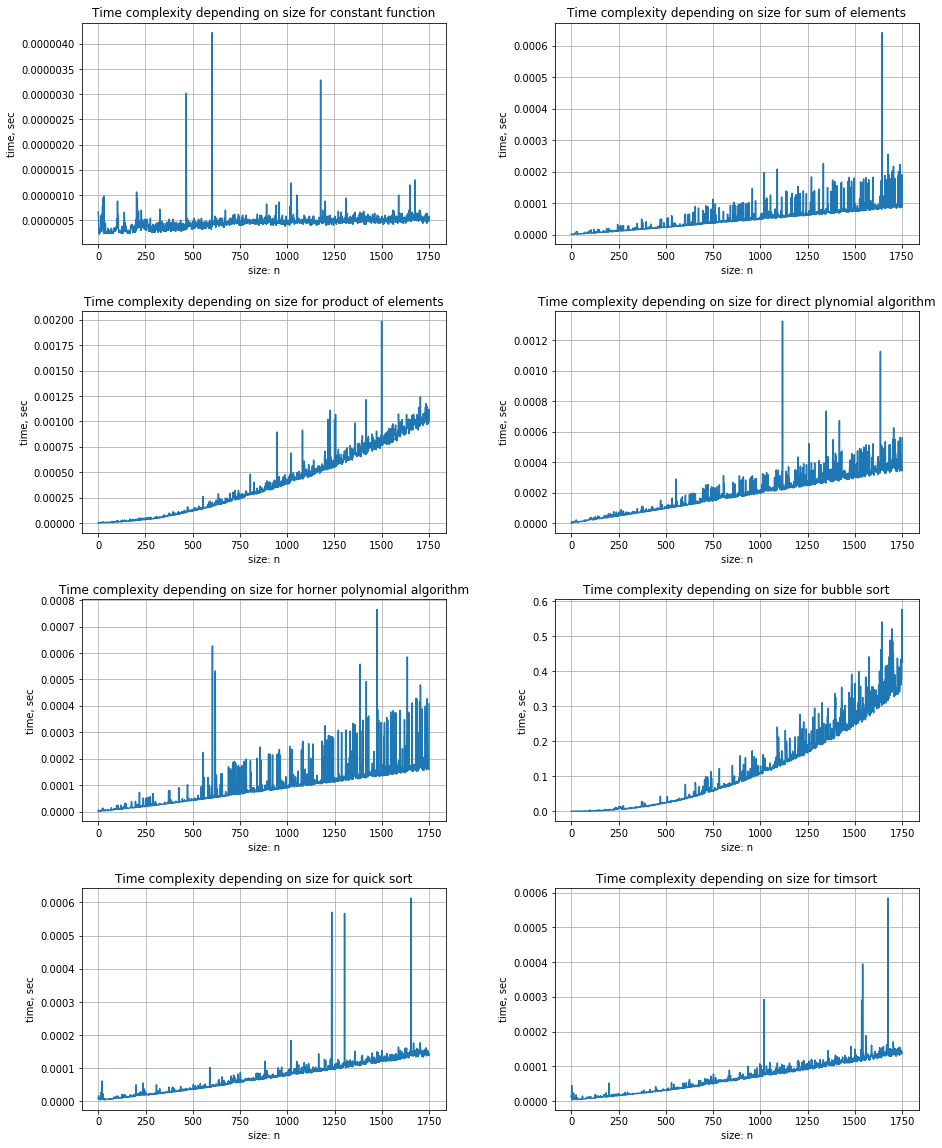

In [203]:

# Visualization

fig = plt.figure(figsize = (15, 20))
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

for alg_num in range(1, 9):

    plt.subplot(4, 2, alg_num)
    plt.plot([i for i in range(len(time_compl_arr['alg_' + str(alg_num)]))], time_compl_arr['alg_' + str(alg_num)])
    plt.title('Time complexity depending on size for {:}'.format(description_arr[alg_num - 1]))
    
    plt.xlabel('size: n')
    plt.ylabel('time, sec')
    plt.grid()
    
plt.show()


C:\Users\79312\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
C:\Users\79312\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]


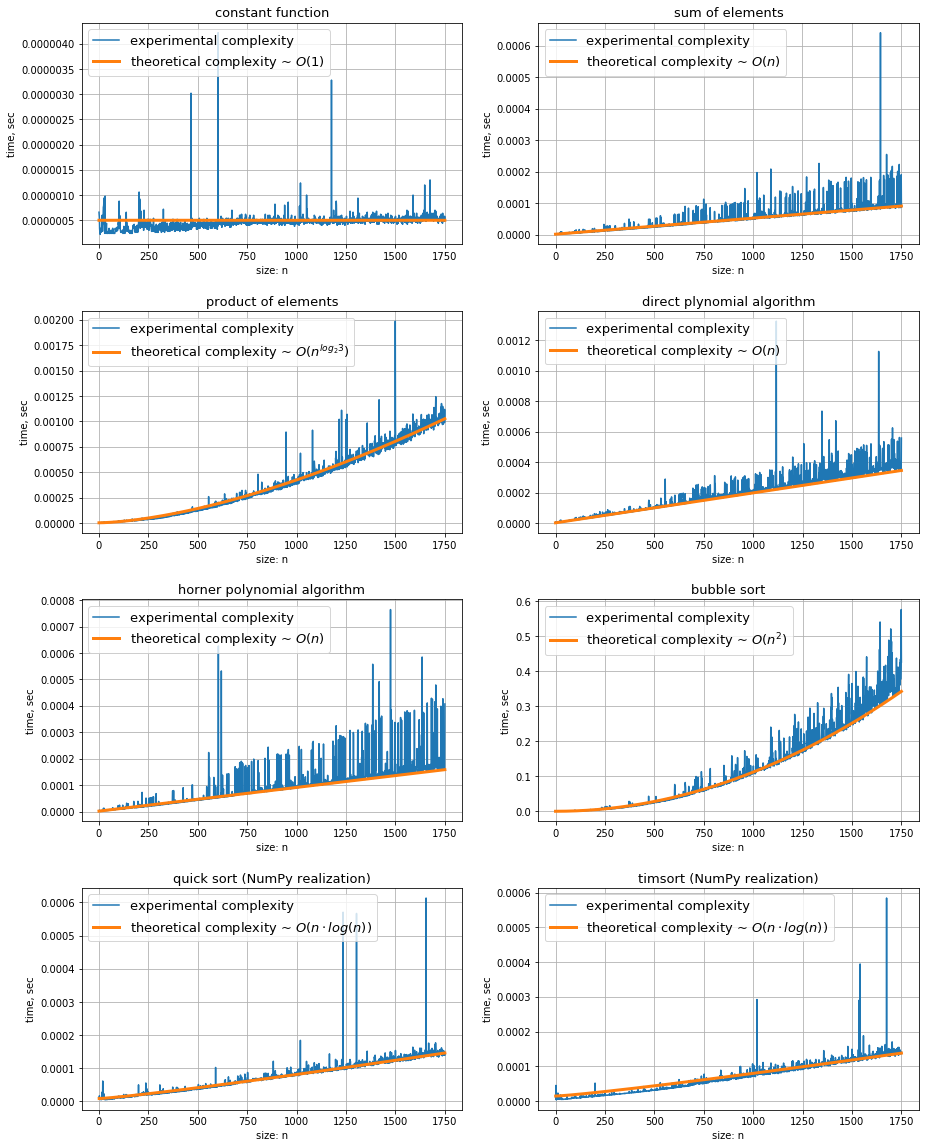

<Figure size 432x288 with 0 Axes>

In [233]:
# Emperical and theoretical time complexity comparison

def const_time(n):
    return 1

def linear_time(n):
    return n

def poly_time(n):
    return n ** 2

def nlogn_time(n):
    return n * np.log(n)

def karazuba_time(n):
    return n ** (np.log(3)/np.log(2))

smth = ([''] * 6)
smth.append(' (NumPy realization)')
smth.append(' (NumPy realization)')
descr_arr = ['$O(1)$', '$O(n)$', '$O(n^{log_2 3})$', '$O(n)$', '$O(n)$', '$O(n^{2})$',\
             '$O(n \cdot log(n))$', '$O(n \cdot log(n))$']
time_compl_func_dict = {'alg_1': const_time, 'alg_2': linear_time, 'alg_3': karazuba_time, 'alg_4': linear_time,\
                        'alg_5': linear_time, 'alg_6': poly_time, 'alg_7': nlogn_time, 'alg_8': nlogn_time}

fig = plt.figure(figsize = (15, 20))
plt.subplots_adjust(wspace = 0.2, hspace = 0.3)


for alg_num in range(1, 9):

    curr_alg_num = 'alg_' + str(alg_num)
    
    plt.subplot(4, 2, alg_num)
    plt.plot([i for i in range(len(time_compl_arr[curr_alg_num]))], time_compl_arr[curr_alg_num])
    
    # If theoretical time complexity for some f(...) is O(g(n)) => 
    # => have to search constant in equation: f(n) = f(0) + C * g(n) => 
    # => We can find C for any fixed n_i: C = (f(n_i) - f(0))/g(n_i) in such a way 
    # to show similar trends in theoretical and experimental time
    
    n_i = int(0.9 * len(time_compl_arr[curr_alg_num]))
    C = (time_compl_arr[curr_alg_num][n_i] - time_compl_arr[curr_alg_num][0])/time_compl_func_dict[curr_alg_num](n_i)

    x = [i for i in range(len(time_compl_arr[curr_alg_num]))]
    y = [time_compl_arr[curr_alg_num][0] + C * time_compl_func_dict[curr_alg_num](i) for i in x]
    plt.plot(x, y,  linewidth = 3.0)
    
    plt.title(description_arr[alg_num - 1] + smth[alg_num - 1], size = 13)
    plt.legend(['experimental complexity', 'theoretical complexity ~ ' + descr_arr[alg_num - 1]],\
               prop = {'size': 13}, loc = 'upper left')

    plt.xlabel('size: n')
    plt.ylabel('time, sec')
    plt.grid()
    
plt.show()
plt.tight_layout()

## 1.2 Generate random matrices A and B of size n × n with non-negative elements. Calculate the  time complexity for usual matrix product for A and B:

In [40]:
import numpy as np
from time import perf_counter as time
import matplotlib.pyplot as plt


# Algorithm of matrix production
def matrix_prod(A, B):
    
    n = len(A)
    ans = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            for k in range(n):
                ans[i, j] += A[i][k] * B[k][j]
                
    return ans


# Working part
np.random.seed(7)
max_n = 500
time_res_arr = []

for n in range(1, max_n):
    
    A = np.random.random((n, n))
    B = np.random.random((n, n))
    
    curr_time_arr = []
    for i in range(5):
        start_time = time()
        matrix_prod(A, B)
        end_time = time()
        curr_time_arr.append(end_time - start_time)
    
    time_res_arr.append(np.mean(curr_time_arr))


KeyboardInterrupt: 

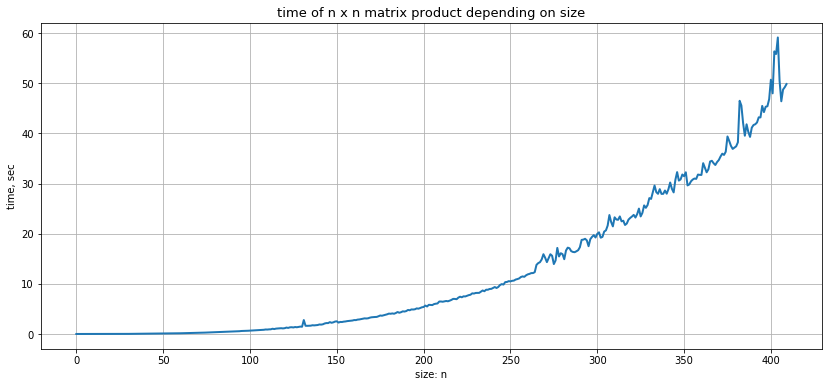

In [205]:
# I think fluctuations in values after the value of n = 250 are associated with an increase in the use of RAM by the computer

fig = plt.figure(figsize = (14, 6))
plt.plot([i for i in range(len(time_res_arr))], time_res_arr, linewidth = 2.0)

plt.title('time of n x n matrix product depending on size', size = 13)
plt.xlabel('size: n')
plt.ylabel('time, sec')

plt.grid()
plt.show()

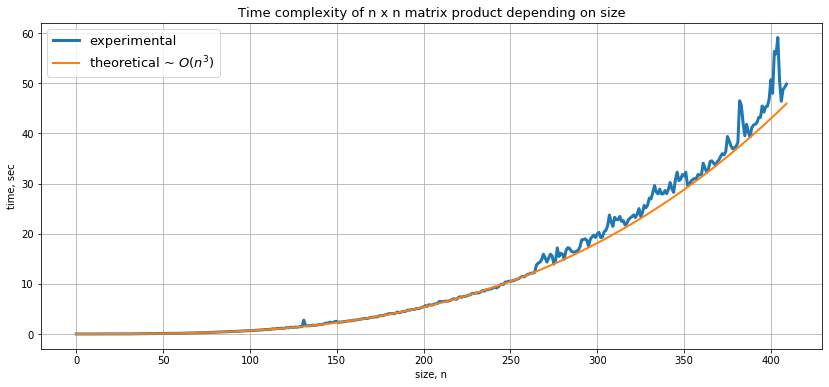

In [216]:
# Must make sure that the resulting complexity meets the theoretical - O(n^3):
fig = plt.figure(figsize = (14, 6))
plt.plot([i for i in range(len(time_res_arr))], time_res_arr,  linewidth = 3.0)

# y = C * (n ** 3) => C = y/(n ** 3) - constant searching:
n_i = 250
C = time_res_arr[n_i]/(n_i ** 3)

x = [i for i in range(len(time_res_arr))]
y = [C * i ** 3 for i in x]
plt.plot(x, y,  linewidth = 2.0)

plt.title('Time complexity of n x n matrix product depending on size', size = 13)
plt.xlabel('size, n')
plt.ylabel('time, sec')

plt.legend(['experimental', 'theoretical ~ $O(n^{3})$'], prop = {'size': 13})
plt.grid()
plt.show()